# About the dataset

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


# Import necessary library

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge

In [75]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [76]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath)

In [77]:
df.to_csv('housing.csv')

## Module 1: Importing the datasets

In [78]:
df = pd.read_csv('housing.csv')
df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [79]:
df.head(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1

Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [80]:
#Enter Your Code, Execute and take the Screenshot
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


We use the method describe to obtain a statistical summary of the dataframe.


In [81]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [82]:
# df[['bedrooms', 'bathrooms', 'floors', 'grade', 'sqft_living', 'price']].groupby(by=['bedrooms', 'bathrooms', 'floors', 'grade'], as_index=True).mean()

## Module 2: Data Wrangling

### Question 2

Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Make sure the <code>inplace</code> parameter is set to <code>True</code>. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [83]:
#Enter Your Code, Execute and take the Screenshot
df.drop(columns=['id', 'Unnamed: 0'], axis=1, inplace=True)

We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [84]:
# missing_data = df.isnull().sum()
# missing_data = missing_data[missing_data > 0]

# plt.figure(figsize=(10,8))
# sns.barplot(x=missing_data.index, y=missing_data.values, palette='coolwarm')

# plt.ylabel('Number of Missing Values')
# plt.xlabel('Columns')
# plt.title('Missing Value per Columns')

# plt.xticks(rotation=90)

In [85]:
# df.info()
# df.bedrooms.value_counts()
# df.bathrooms.value_counts()

In [86]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column <code>'bedrooms'</code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [87]:
mean = df.bedrooms.mean()
df.bedrooms = df.bedrooms.replace(np.NaN, mean)

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [88]:
mean = df.bathrooms.mean()
df.bathrooms = df.bathrooms.replace(np.NaN, mean)

In [89]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


## Module 3: Exploratory Data Analysis

### Question 3

Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [90]:
#Enter Your Code, Execute and take the Screenshot
df.floors.value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project. 


<Axes: xlabel='waterfront', ylabel='price'>

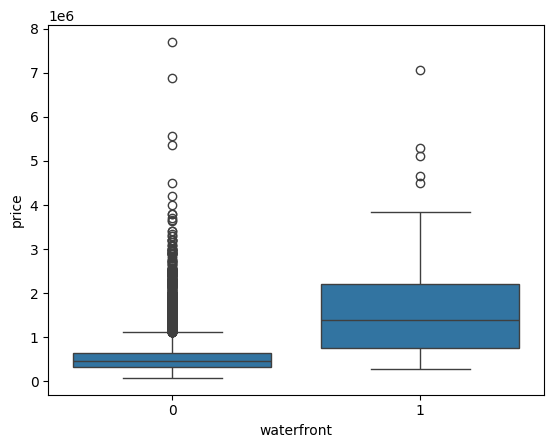

In [91]:
#Enter Your Code, Execute and take the Screenshot
sns.boxplot(data=df, x='waterfront', y='price')

### Question 5

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. You will need to submit the screenshot for the final project. 


(0.0, 8081250.0)

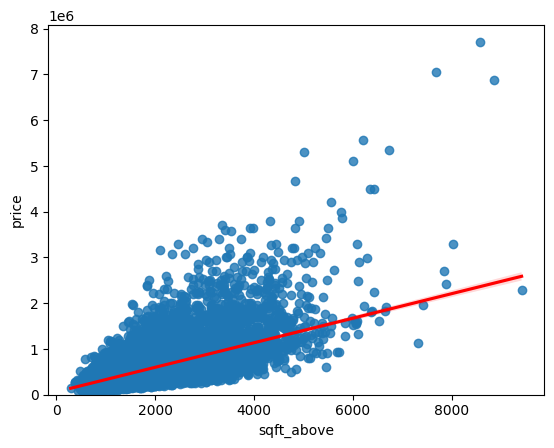

In [93]:
#Enter Your Code, Execute and take the Screenshot
sns.regplot(data=df, x='sqft_above', y='price', line_kws={'color': 'red'})
plt.ylim(0, )

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [94]:
df.corr(numeric_only=True)['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

## Module 4: Module Deployment

We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [102]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
print(f"R^2 Score: {lm.score(X, Y)}")

R^2 Score: 0.00046769430149007363


### Question  6

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [103]:
#Enter Your Code, Execute and take the Screenshot
X = df[['sqft_living']]
Y = df['price']
lm.fit(X,Y)
print(f"R^2 Score: {lm.score(X, Y)}")

R^2 Score: 0.4928532179037931


### Question 7

Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [100]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [104]:
#Enter Your Code, Execute and take the Screenshot
X = df[features]
Y = df['price']
lm.fit(X,Y)
print(f"R^2 Score: {lm.score(X, Y)}")

R^2 Score: 0.6576378970386156


### This will help with Question 8

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [105]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Question 8

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [106]:
#Enter Your Code, Execute and take the Screenshot
X = df[features]
Y = df['price']
pipe = Pipeline(Input)
yhat = pipe.fit(X,Y).score(X, Y)

print(f"R^2 Score: {yhat}")

R^2 Score: 0.7513404173795294


## Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [108]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Question 9

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [109]:
from sklearn.linear_model import Ridge

In [110]:
#Enter Your Code, Execute and take the Screenshot
rm = Ridge(alpha=0.1)
rm.fit(x_train, y_train)
print(f"R^2 Score: {rm.score(x_test,y_test)}")

R^2 Score: 0.6478759163939111


### Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.


In [111]:
#Enter Your Code, Execute and take the Screenshot
pf = PolynomialFeatures(degree=2, include_bias=False)
x_train_pf = pf.fit_transform(x_train)
x_test_pf = pf.transform(x_test)

rm_pf = Ridge(alpha=0.1)
rm_pf.fit(x_train_pf, y_train)
print(f"R^2 Score: {rm_pf.score(x_test_pf, y_test)}")

R^2 Score: 0.7002744230187512
